Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

For displaying all columns

In [2]:
pd.set_option('display.max_columns', None)

Importing dataset and getting familiar with it

In [3]:
df = pd.read_csv('C:/Users/ASIF MEHDIYEV/Desktop/PwC Forage/bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Checking statiscal values of dataset

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Data Preprocessing

In [5]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [6]:
df.shape

(41188, 21)

In [7]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

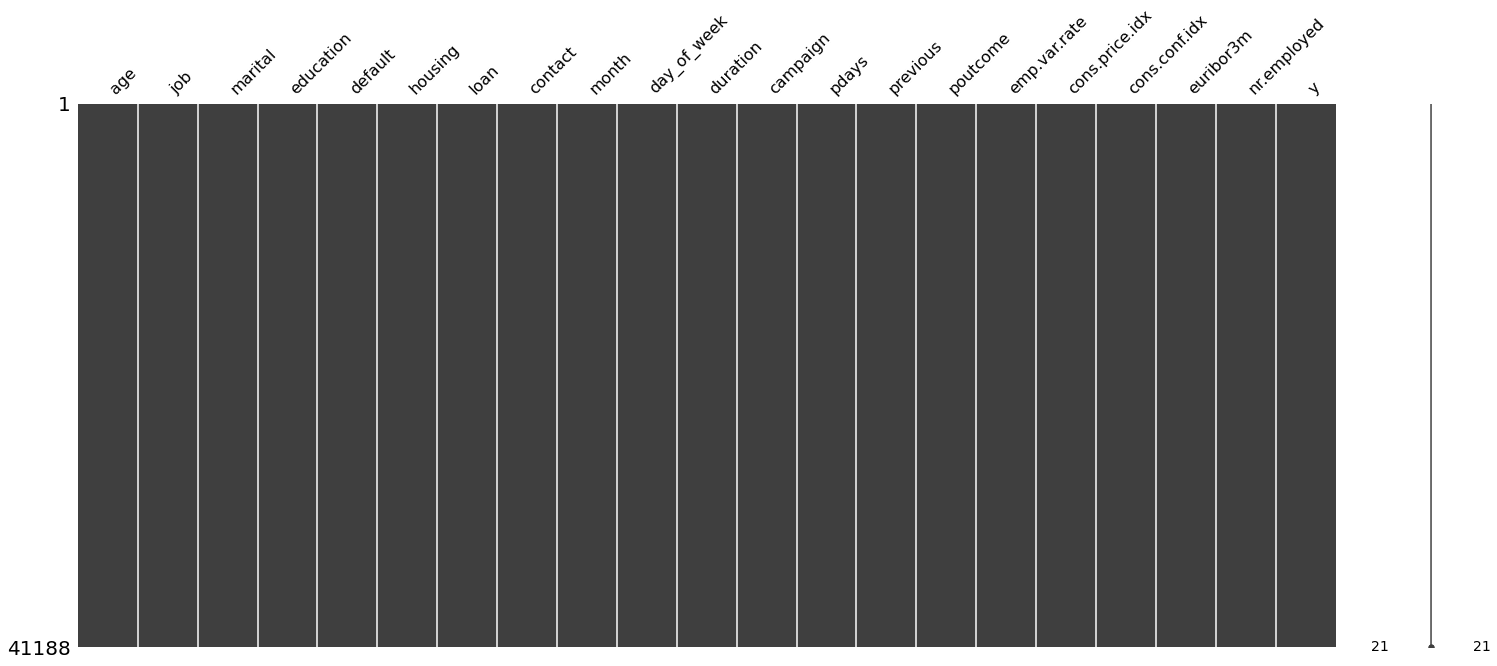

In [11]:
import missingno as msno
msno.matrix(df)

In [12]:
df['age'].min()

17

In [13]:
df['age'].max()

98

In [14]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [16]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [17]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Converting categorical columns into numerical columns

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()


cols_to_encode = ['job', 'marital', 'education', 'default',
   'housing', 'loan', 'contact', 'poutcome', 'y']


# Apply LabelEncoder to each column in columns_to_encode
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,may,mon,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,may,mon,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,may,mon,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,may,mon,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,may,mon,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Exploratory Data Analysis

Checking if target is related with "marital" status

<AxesSubplot:xlabel='y', ylabel='count'>

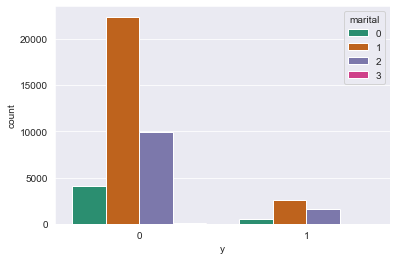

In [21]:
#count-plot of people survided 
sns.set_style('darkgrid')
sns.countplot(x='y', hue='marital', data=df, palette='Dark2') 

Marital Status distribution according to target

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Marital distribution')

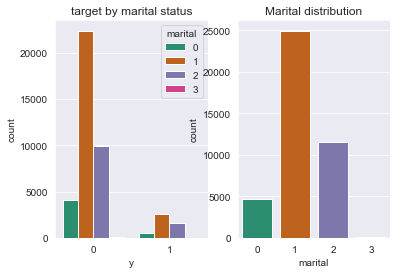

In [22]:
fig, ax = plt.subplots(1, 2)
sns.set_style('darkgrid')
sns.countplot(x='y', hue='marital', data=df,ax=ax[0],palette='Dark2').set_title('target by marital status')
sns.countplot( df['marital'], ax=ax[1],palette='Dark2').set_title('Marital distribution')

Text(0.5, 1.0, 'Target by ')

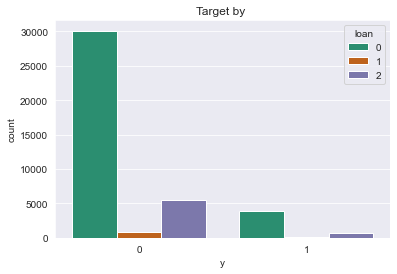

In [23]:
#no. of people who survived according to their Passenger Class
sns.set_style('darkgrid')
sns.countplot(x='y', hue='loan', data=df,palette='Dark2').set_title('Target by ')

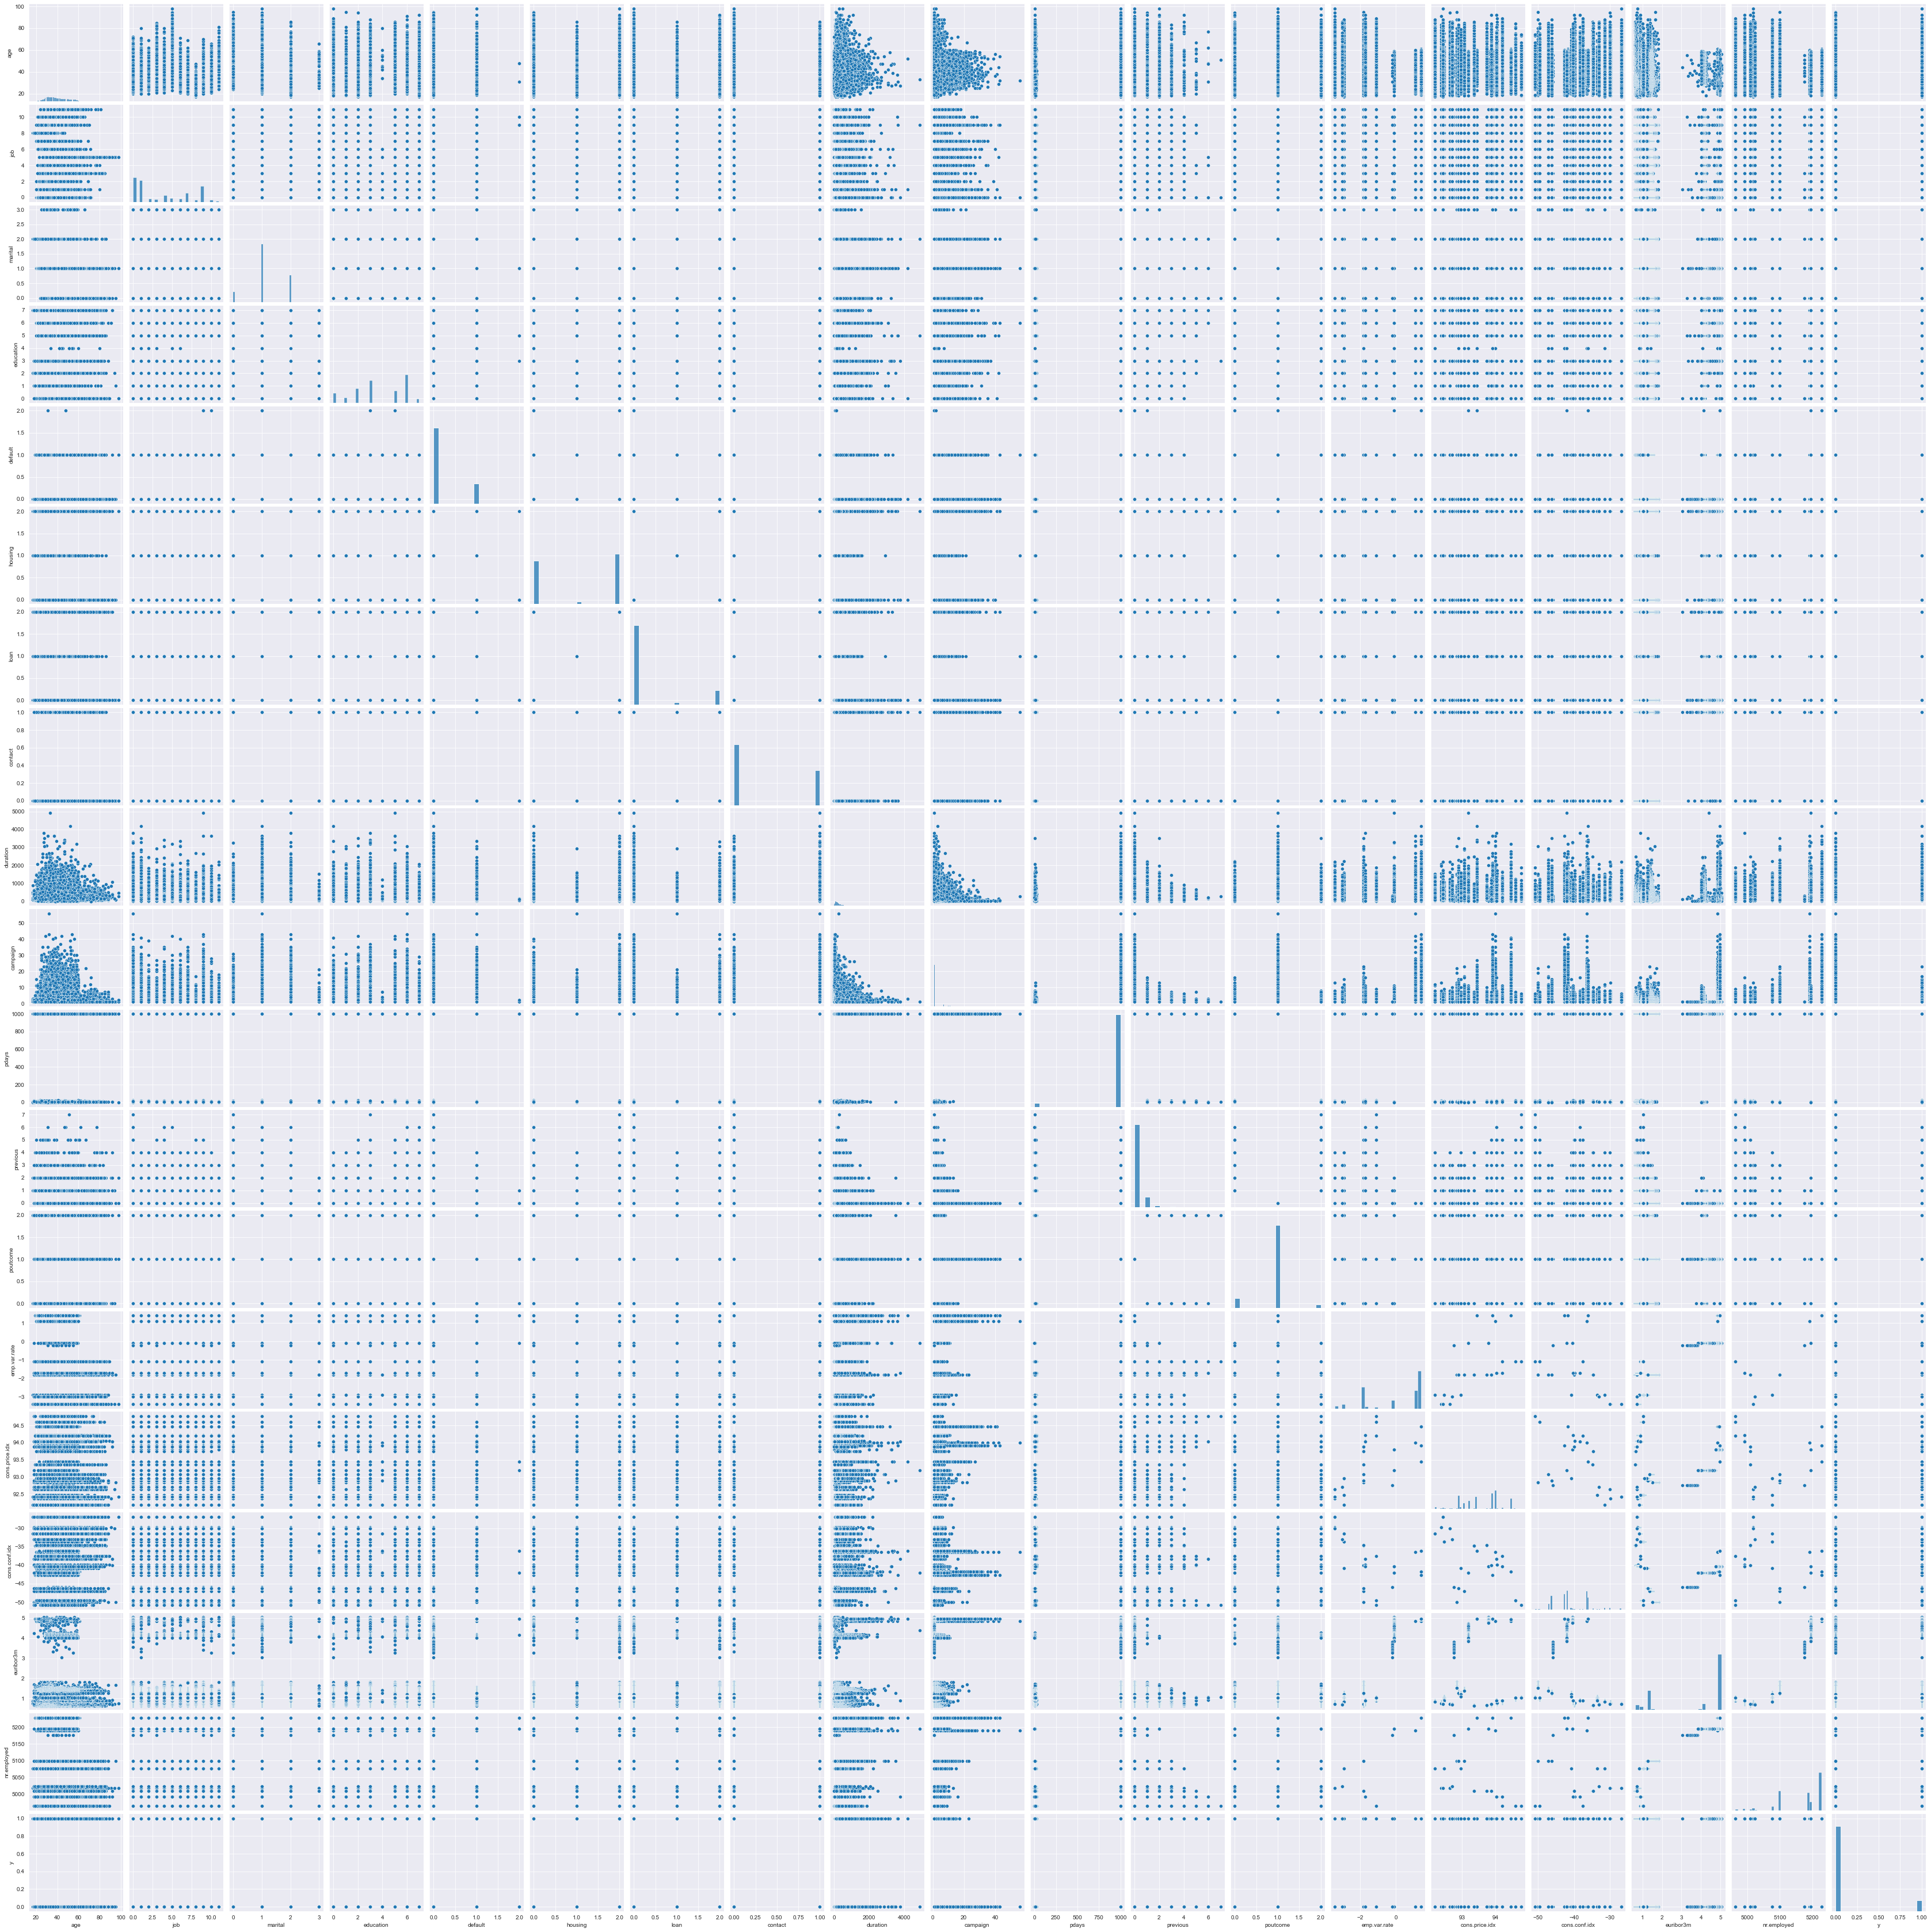

In [24]:
sns.pairplot(df)

Histogram of "age" to see the distribution manner

<AxesSubplot:xlabel='age', ylabel='Count'>

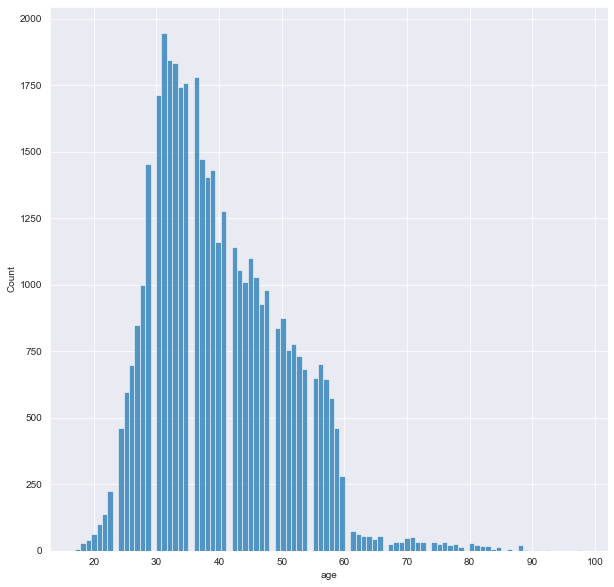

In [25]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x = 'age')

<AxesSubplot:xlabel='duration', ylabel='Count'>

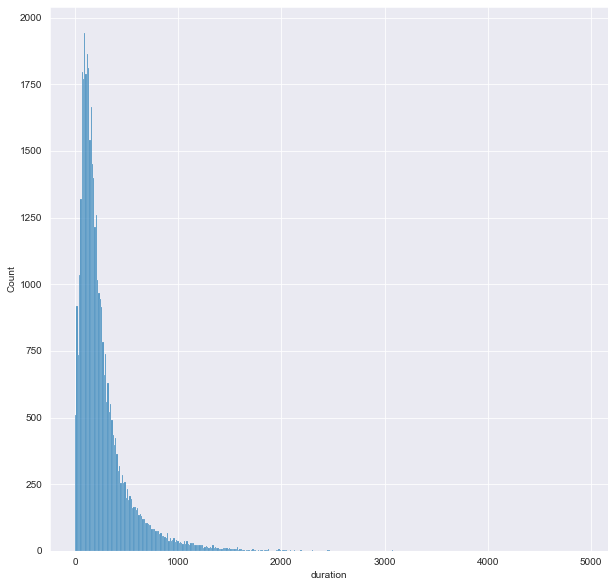

In [26]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x = 'duration')

Checking "marital" status according to "education"

<AxesSubplot:xlabel='marital', ylabel='education'>

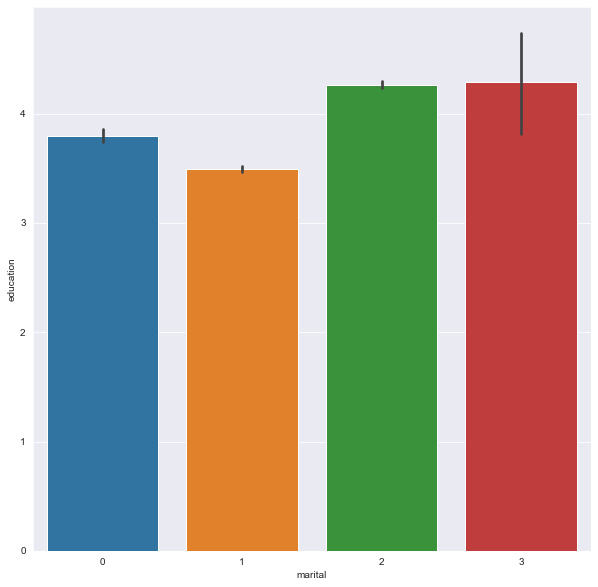

In [27]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, x = 'marital', y = 'education')

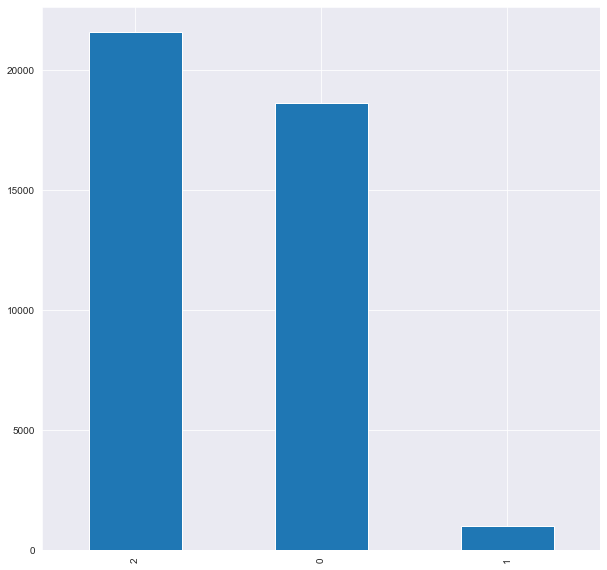

In [28]:
value_counts_1 = df['housing'].value_counts()


plt.figure(figsize=(10,10))
# create a bar plot of the count of each value
value_counts_1.plot(kind='bar')
plt.show()

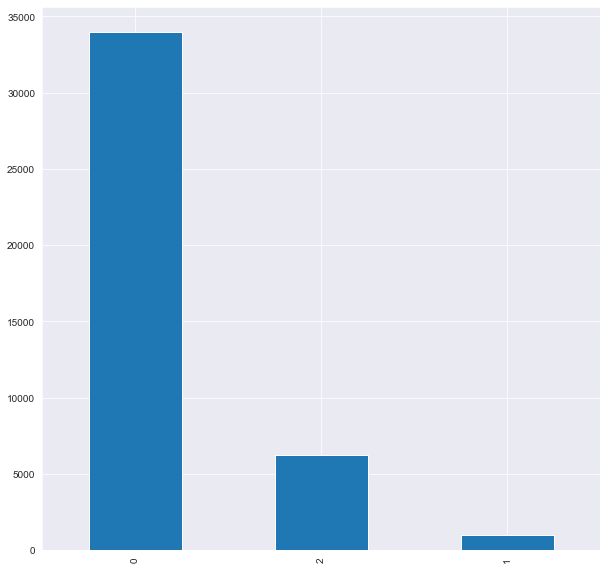

In [29]:
value_counts = df['loan'].value_counts()


plt.figure(figsize=(10,10))
# create a bar plot of the count of each value
value_counts.plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='campaign', ylabel='count'>

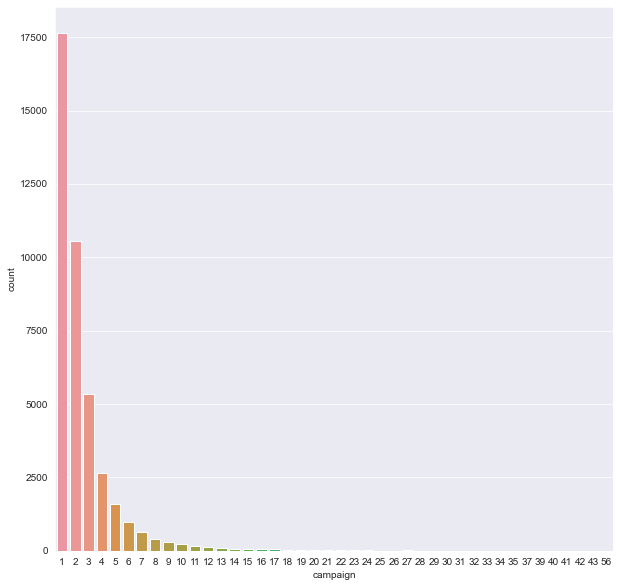

In [30]:
plt.figure(figsize = (10,10))
sns.countplot(x=df['campaign'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

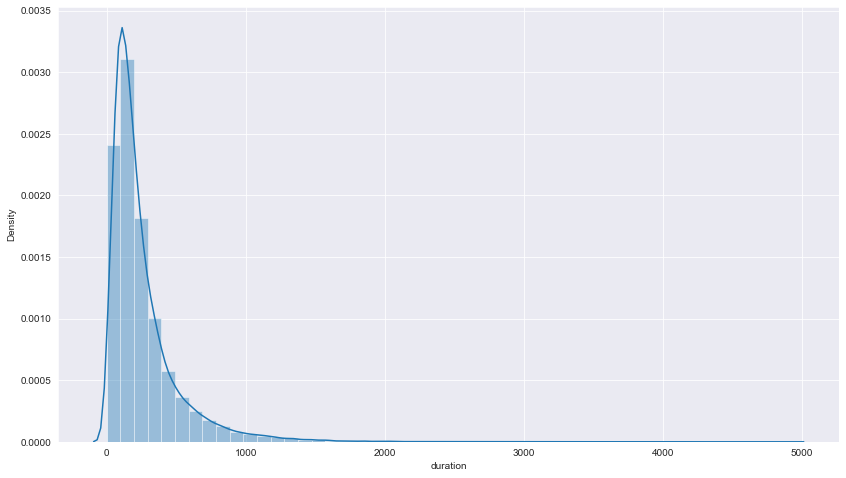

In [31]:
import seaborn as seabornInstance
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(df['duration'])

Correlation heatmap for general mathematical and statiscal overview

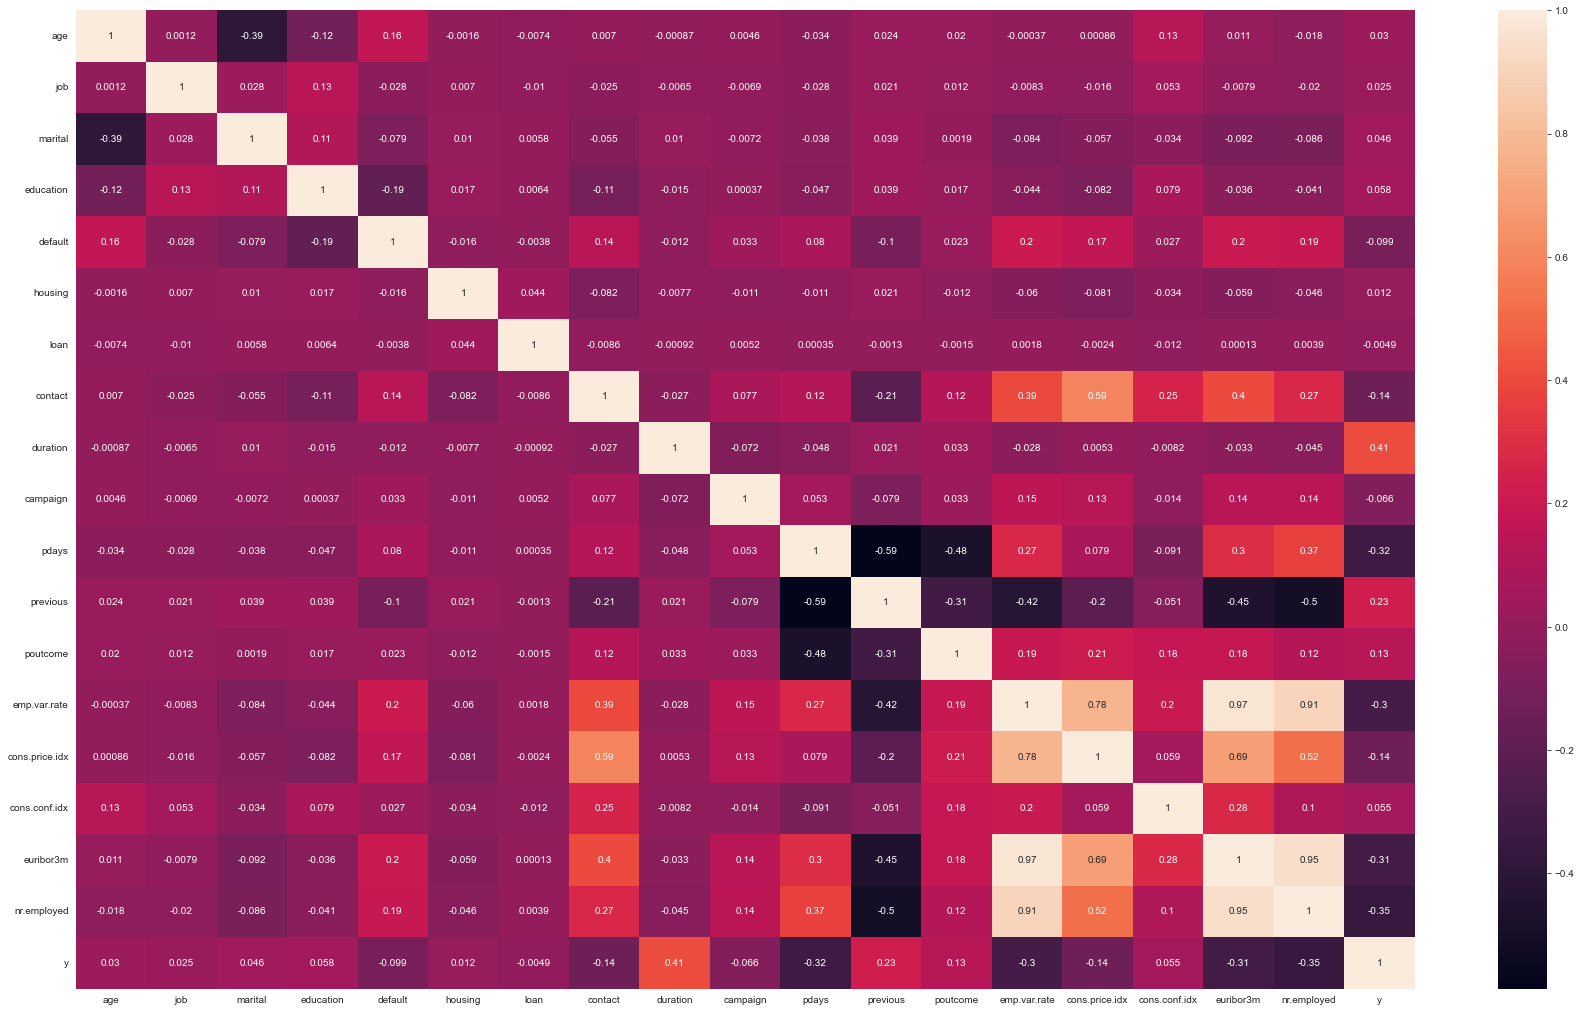

In [32]:
plt.figure(figsize = (30,18))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()

Checking and detecting outliers

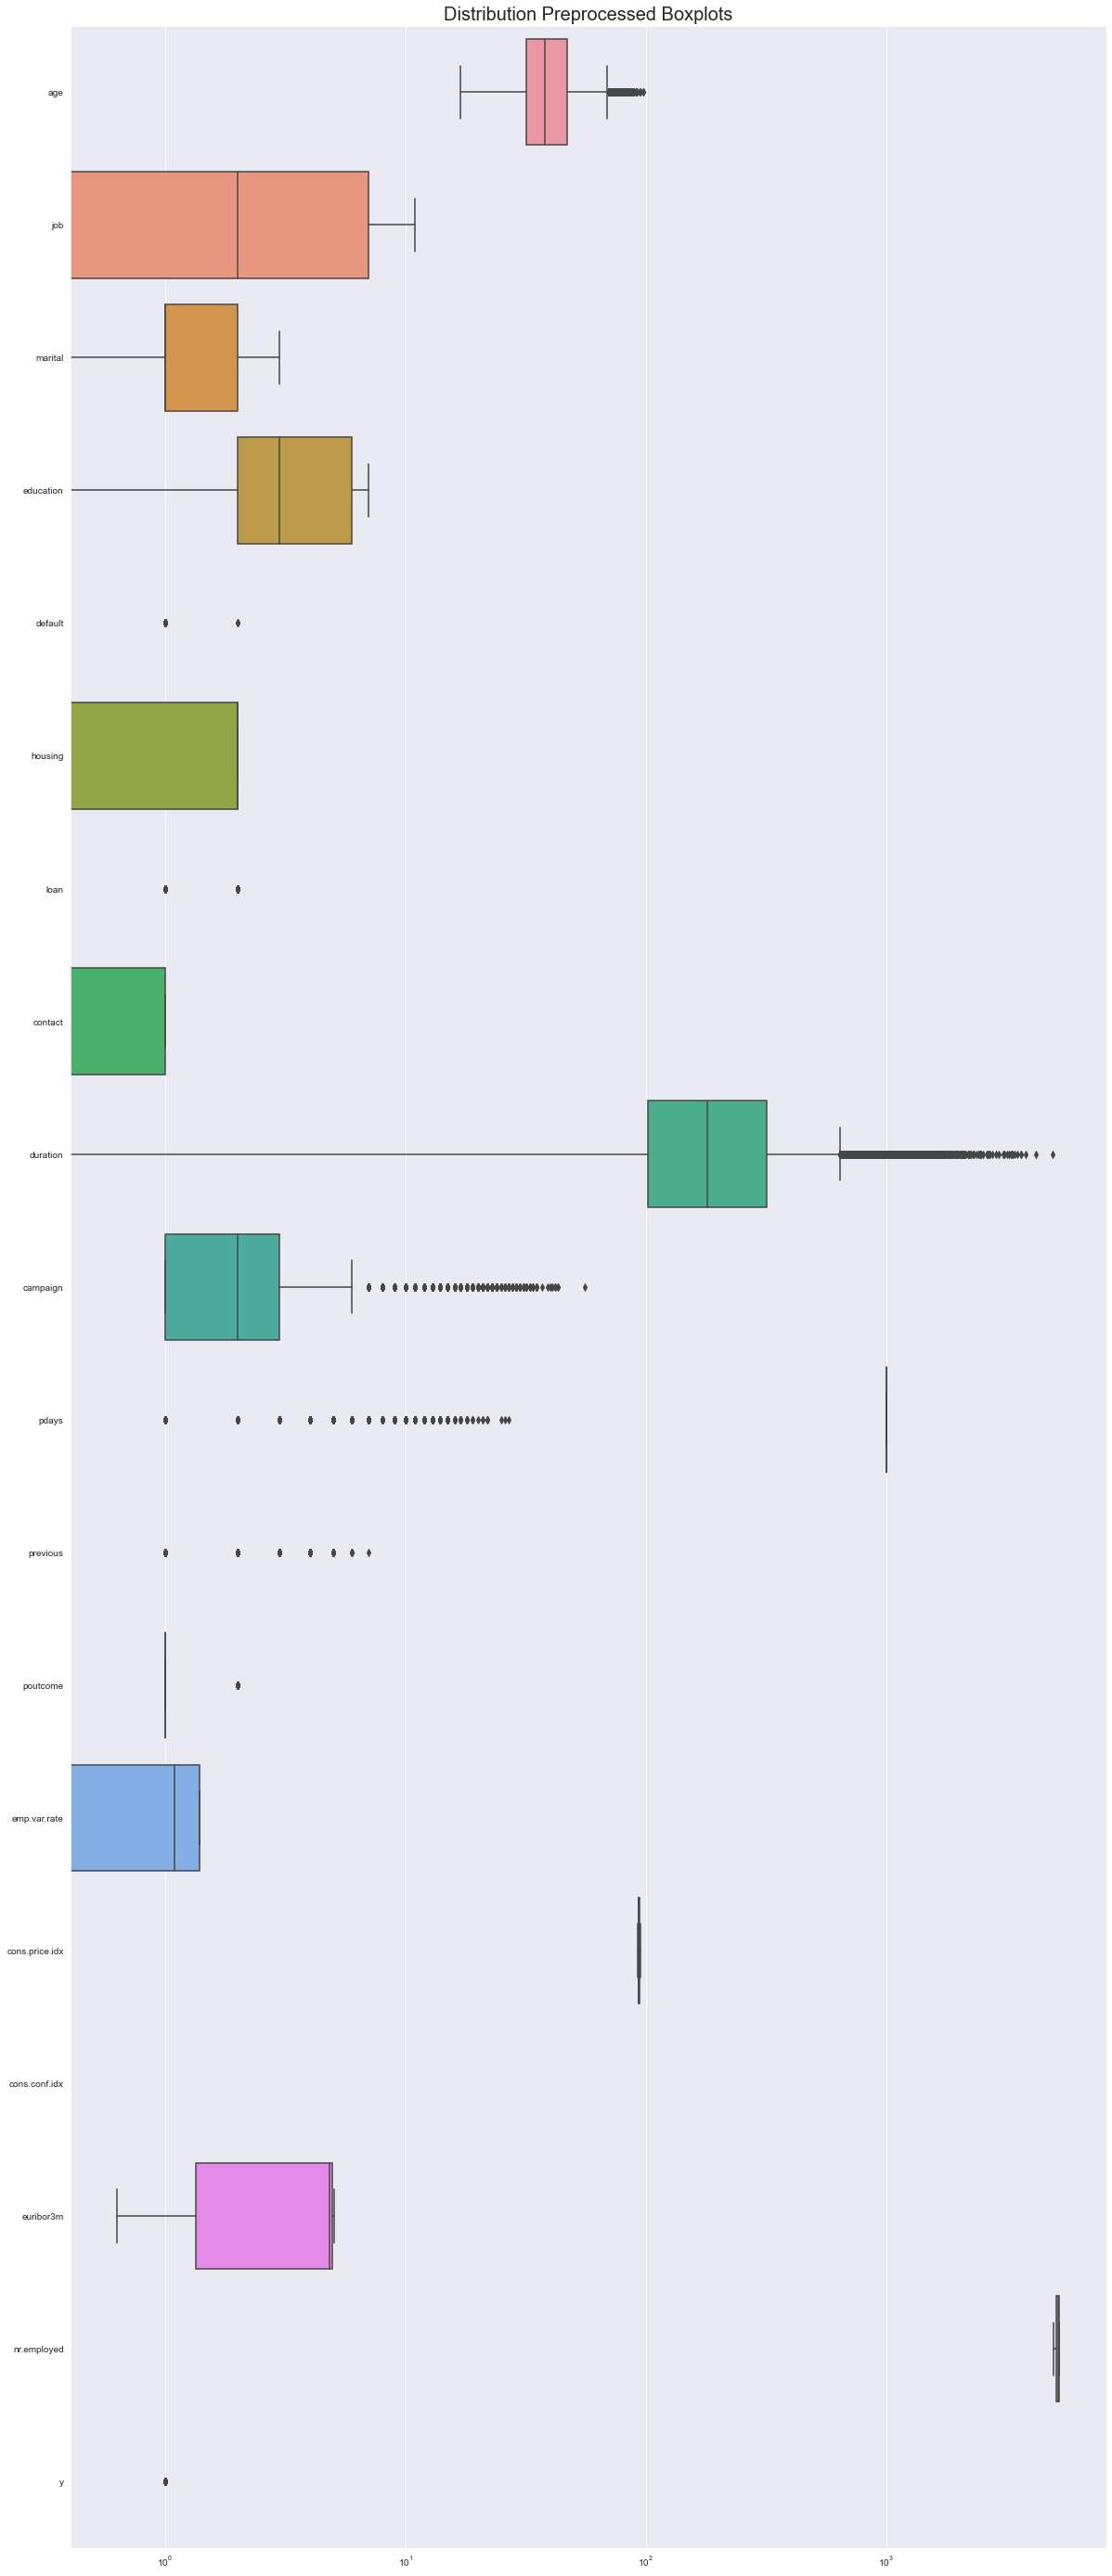

In [33]:
plt.figure(figsize = (20,50))
ax = sns.boxplot(data=df, orient="h")
ax.set_title('Distribution Preprocessed Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

Feature engineering

Outlier handling step by step for needed columns

In [34]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
lowerbound,upperbound = outlier_treatment(df['age'])
df['age']=np.clip(df['age'],a_min=lowerbound,a_max=upperbound)

In [35]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
lowerbound,upperbound = outlier_treatment(df['duration'])
df['duration']=np.clip(df['duration'],a_min=lowerbound,a_max=upperbound)

In [36]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
lowerbound,upperbound = outlier_treatment(df['campaign'])
df['campaign']=np.clip(df['campaign'],a_min=lowerbound,a_max=upperbound)

In [37]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
lowerbound,upperbound = outlier_treatment(df['pdays'])
df['pdays']=np.clip(df['pdays'],a_min=lowerbound,a_max=upperbound)

In [38]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
lowerbound,upperbound = outlier_treatment(df['previous'])
df['previous']=np.clip(df['previous'],a_min=lowerbound,a_max=upperbound)

In [39]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
lowerbound,upperbound = outlier_treatment(df['poutcome'])
df['poutcome']=np.clip(df['poutcome'],a_min=lowerbound,a_max=upperbound)

Checking one more time if the work is done correctly

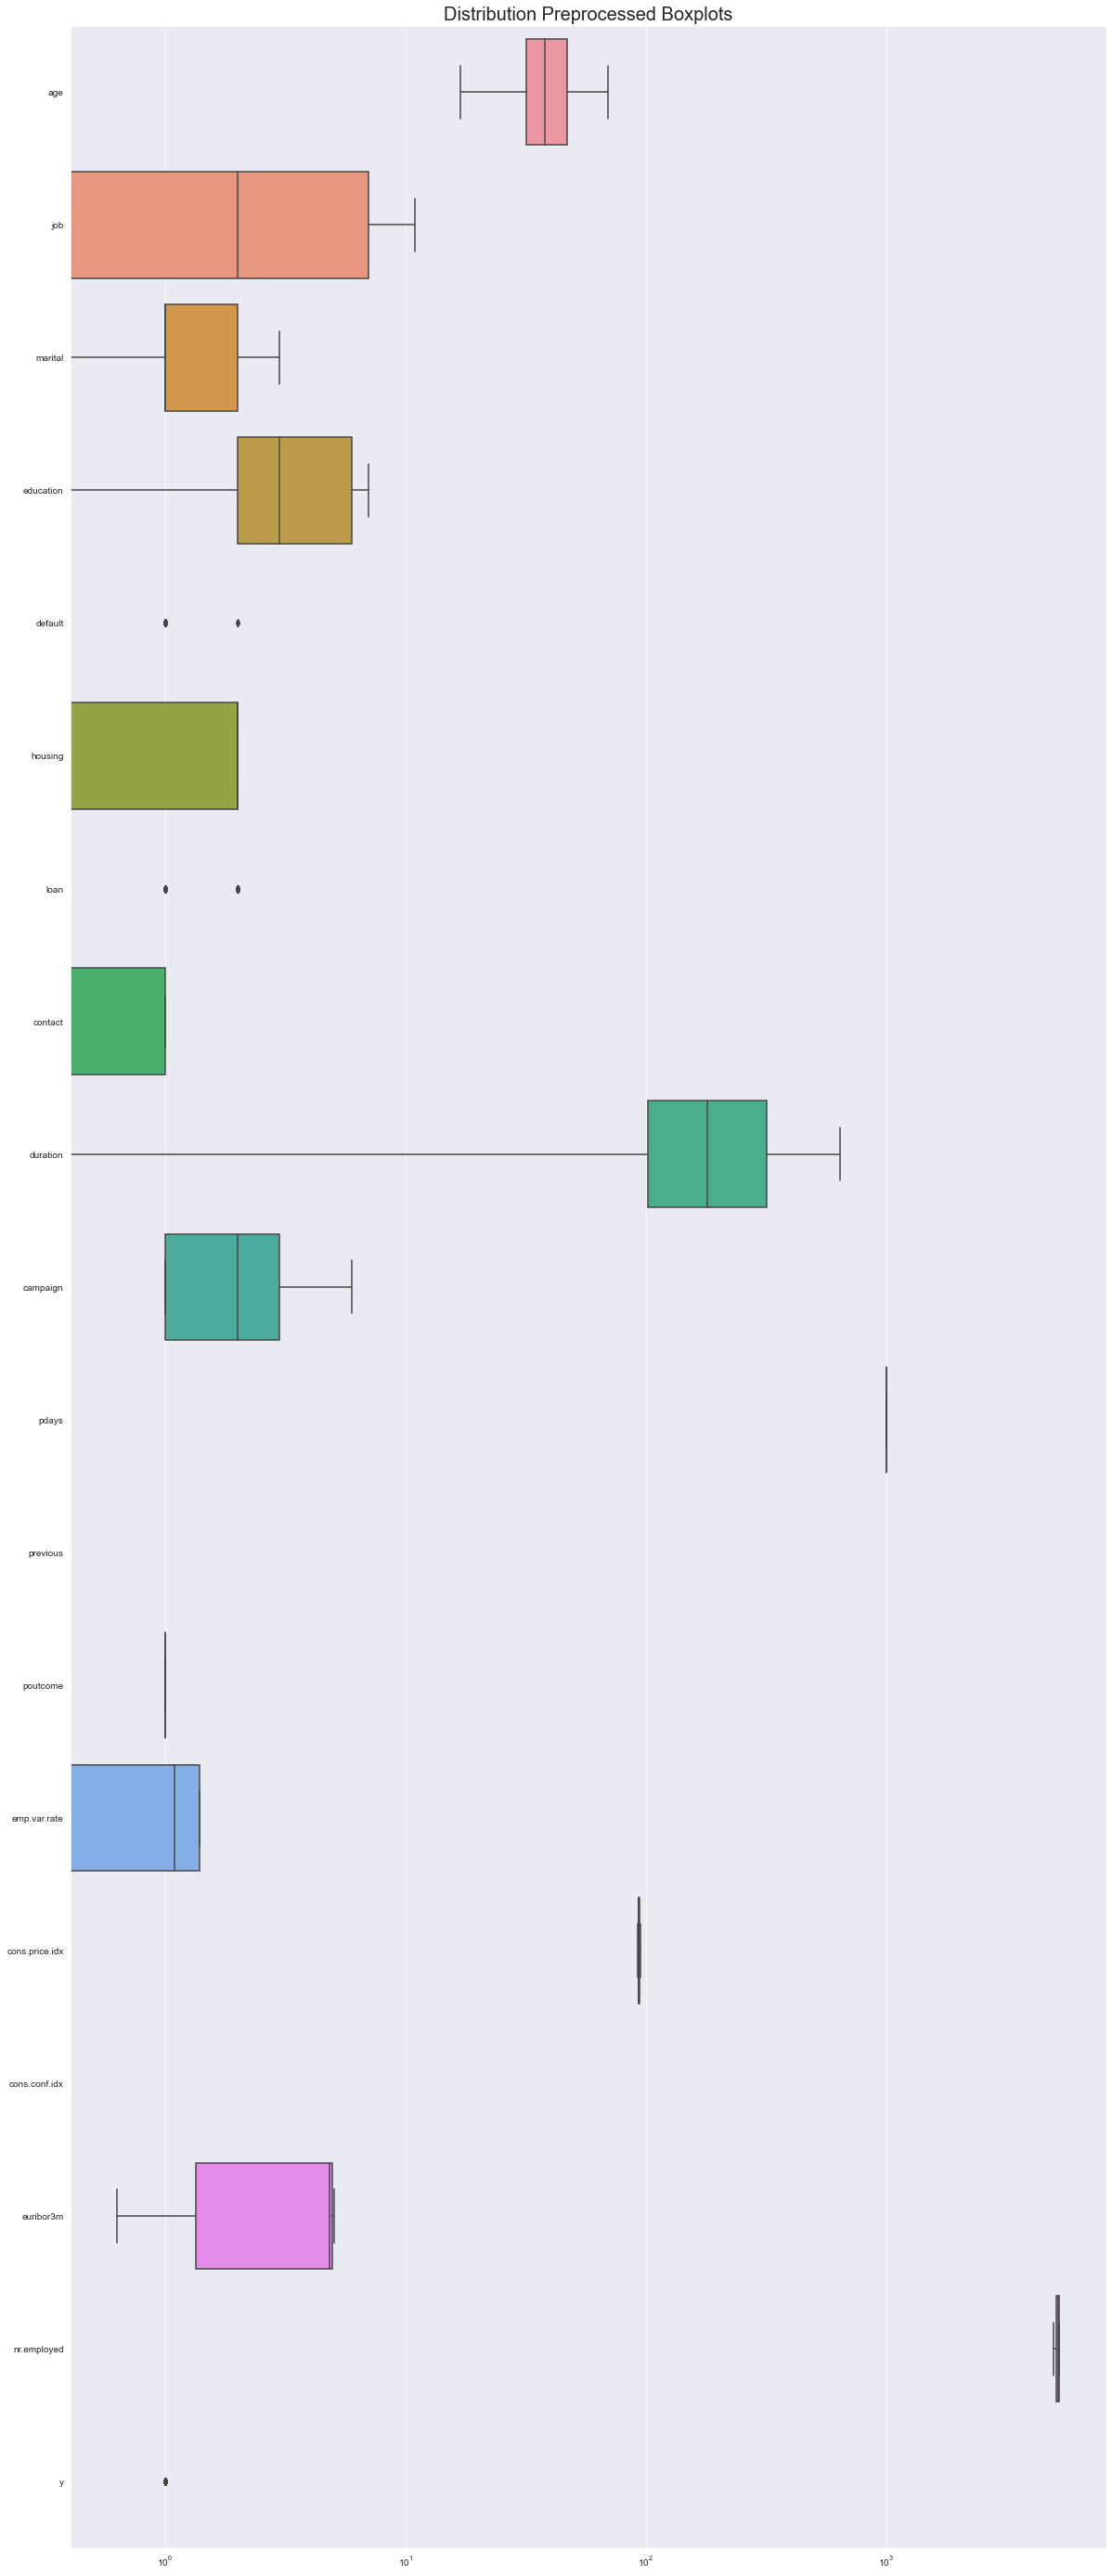

In [40]:
plt.figure(figsize = (20,50))
ax = sns.boxplot(data=df, orient="h")
ax.set_title('Distribution Preprocessed Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

Checking the dataset before modelling

In [41]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,may,mon,261.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,may,mon,149.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,may,mon,226.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,may,mon,151.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,may,mon,307.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0


In [42]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [43]:
le_1 = LabelEncoder()


cols_to_encode = ['month', 'day_of_week']


# Apply LabelEncoder to each column in columns_to_encode
for col in cols_to_encode:
    df[col] = le_1.fit_transform(df[col])

Modelling -> Train test splitting. Because we need to build classification model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1), 
           df['y'], test_size=0.30, 
            random_state=101)

Firstly, We try the "Logistic Regression" model

In [45]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model 
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

Checking the predictions

In [46]:
#predictions
predictions = logmodel.predict(X_test)

In [47]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

Printing the classification report: as we see the model predicted 0 very well but did not predict 1 so well

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10978
           1       0.61      0.33      0.43      1379

    accuracy                           0.90     12357
   macro avg       0.77      0.65      0.69     12357
weighted avg       0.89      0.90      0.89     12357



In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[10685   293]
 [  921   458]]


In [50]:
logmodel.predict_proba(X_test)[:,1]

array([0.02434699, 0.00706063, 0.01597054, ..., 0.02723737, 0.00727978,
       0.01115611])

In [51]:
y_test

3669     0
20131    0
2492     0
14088    0
34986    0
        ..
10909    0
13525    0
27228    0
23043    0
917      0
Name: y, Length: 12357, dtype: int32

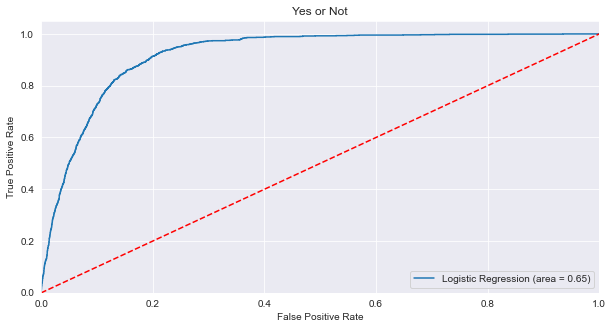

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Yes or Not')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Next, we try Naive Bayes model

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [55]:
predicted = NBmodel.predict(X_test)

In [56]:
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [58]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [59]:
print('Confusion Matrix for Naive Bayes:''\n',cm2)

Confusion Matrix for Naive Bayes:
 [[9040 1938]
 [ 442  937]]


In [60]:
print('Accuracy Score for Naive Bayes:',score2)

Accuracy Score for Naive Bayes: 0.8073966173019341


As we see below, Naive Bayes predictions for 1 is not performing well

In [61]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.95      0.82      0.88     10978
           1       0.33      0.68      0.44      1379

    accuracy                           0.81     12357
   macro avg       0.64      0.75      0.66     12357
weighted avg       0.88      0.81      0.83     12357



In [62]:
print('Auc Score for Naive Bayes:',auc2)

Auc Score for Naive Bayes: 0.7514714972829171


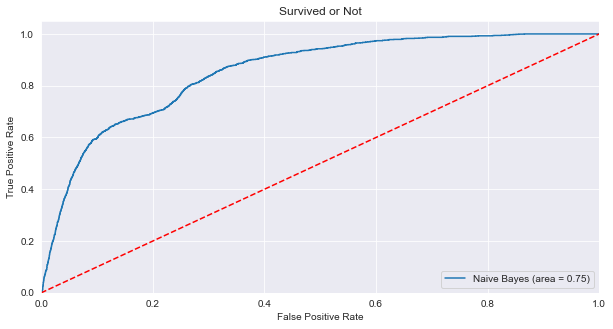

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

Next, we try Support Vector Machine model

In [65]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [66]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
y_test

3669     0
20131    0
2492     0
14088    0
34986    0
        ..
10909    0
13525    0
27228    0
23043    0
917      0
Name: y, Length: 12357, dtype: int32

Model accuracy is not bad

In [68]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8884033341425912


In [69]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scores for 0 are good, but not good for 1

In [70]:
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10978
           1       0.00      0.00      0.00      1379

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
print('Confusion Matrix for SVM:''\n',cm3)

Confusion Matrix for SVM:
 [[10978     0]
 [ 1379     0]]


In [73]:
print('Accuracy Score for SVM:',score3)

Accuracy Score for SVM: 0.8884033341425912


In [74]:
print('Auc Score for svm:',auc3)

Auc Score for svm: 0.5


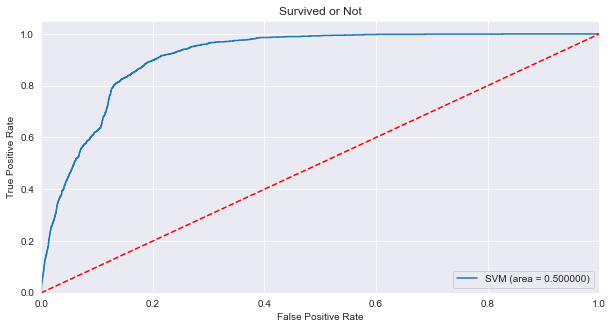

In [75]:
SVM_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

Next, we try Decision Tree Classifier

In [76]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [77]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8854090798737557


As we see below, Decision Tree also performs well for 0 but not for 1

In [79]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     10978
           1       0.49      0.50      0.50      1379

    accuracy                           0.89     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [80]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8849235251274581


In [81]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     10978
           1       0.48      0.48      0.48      1379

    accuracy                           0.88     12357
   macro avg       0.71      0.71      0.71     12357
weighted avg       0.88      0.88      0.88     12357



Next we try Random Forest classifier

In [82]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [83]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

In [84]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Random Forest performs good for both cases

In [85]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     10978
           1       0.58      0.43      0.50      1379

    accuracy                           0.90     12357
   macro avg       0.76      0.70      0.72     12357
weighted avg       0.89      0.90      0.90     12357



But to be more exact, we will try XGBoost Classifier for better report

In [86]:
import xgboost as xgb
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.9066925629198025


XGBoost performs better for both cases

In [87]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10978
           1       0.59      0.53      0.56      1379

    accuracy                           0.91     12357
   macro avg       0.77      0.74      0.75     12357
weighted avg       0.90      0.91      0.90     12357



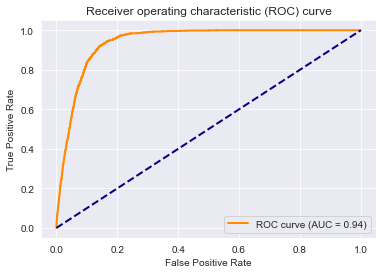

In [88]:
from sklearn.metrics import roc_curve, auc

# Make predictions on the test set
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()